In [1]:
#Importing requisite libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

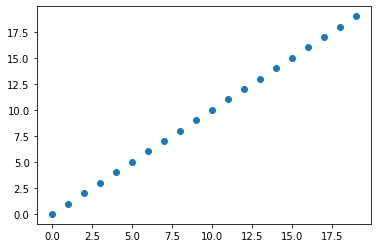

In [2]:
#Creating a cleaned dataset
np.random.seed(42)
X1_clean = np.array(range(20))
X2_clean = np.array(range(20))

#Plotting the points
plt.scatter(X1_clean, X2_clean)

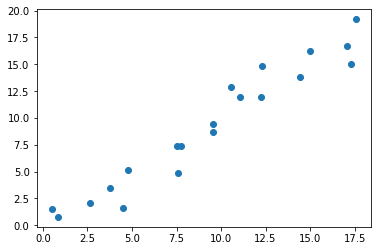

In [3]:
# Adding noise

X1_noise = np.random.randn(1,20)[0]
X2_noise = np.random.randn(1,20)[0]

X1 = X1_clean + X1_noise
X2 = X2_clean + X2_noise

data  = np.column_stack((X1,X2))

#Plotting the data
plt.scatter(X1,X2)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_compressed = pca.fit_transform(data)
pca.explained_variance_ratio_

array([0.98410549, 0.01589451])

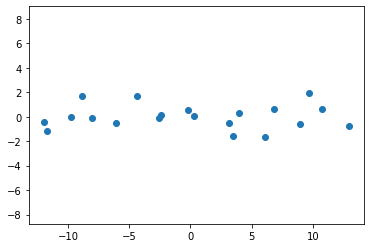

In [5]:
plt.axis('equal')
plt.scatter(data_compressed[:,0], data_compressed[:,1])

In [6]:
pca.components_

array([[ 0.68029065,  0.73294245],
       [ 0.73294245, -0.68029065]])

The two components are the projections of all the points in the original dataset taken along the lines:

0.68029 X1 + 0.7329 X2 (which is approximately the y = X line). The reason it is not exactly the y=X axis is because of the random noise that has skewed the data a little
0.7329 X1 - 0.68029 X2

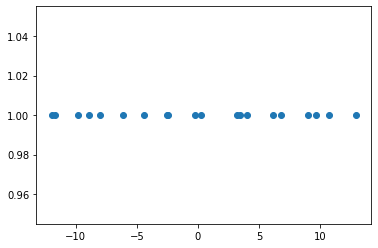

In [7]:
pca = PCA(n_components = 1)
data_compressed = pca.fit_transform(data)
plt.scatter(data_compressed, [1]*20)

In [8]:
pca.components_

array([[0.68029065, 0.73294245]])

In [11]:
data[:5]

array([[0.49671415, 1.46564877],
       [0.8617357 , 0.7742237 ],
       [2.64768854, 2.0675282 ],
       [4.52302986, 1.57525181],
       [3.76584663, 3.45561728]])

In [12]:
data_compressed[:5]

array([[-11.70209097],
       [-11.96054501],
       [ -9.79766023],
       [ -8.88269333],
       [ -8.01959833]])

# **Iris Dataset PCA**

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
print (iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
#importing and instantiating PCA with 2 components.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
#Fitting PCA to the iris dataset and transforming it into 2 principal components
X, y = iris.data, iris.target
X_proj = pca.fit_transform(X)
print (X_proj.shape)

(150, 2)


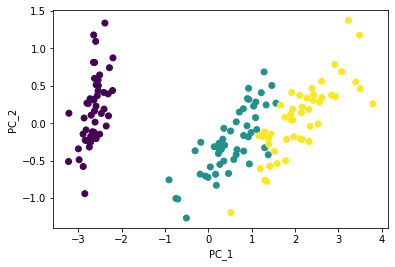

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
        
#Plotting the principal components
plt.scatter(X_proj[:,0], X_proj[:,1],c=y)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.show()

In [18]:
print ("Meaning of the 2 components:")
for component in pca.components_:
  print (" + ".join("%.2f x %s" % (value, name)
    for value, name in zip(component, iris.feature_names)))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.17 x petal length (cm) + -0.08 x petal width (cm)


In [20]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

# **MNIST Dataset PCA**

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [25]:
#looking at data, there looks to be 64 features, what are these?
print (digits.data.shape)
#another available dataset is called images. Let's check this out.
print (digits.images.shape)
        
#So, the features are nothing but a reshape of the images data 8X8 pixels thrown next to each other describing the  
#intensity of each pixel. The imput is a set of images of digits from which we need to learn the target, 
#which is the actual digit itself.

(1797, 64)
(1797, 8, 8)


In [26]:
#Let's run PCA with 2 components so as to plot the data in 2D
X,y = digits.data, digits.target
pca_digits=PCA(2)
X_proj = pca_digits.fit_transform(X)
print (np.sum(pca_digits.explained_variance_ratio_))

0.285093648236981


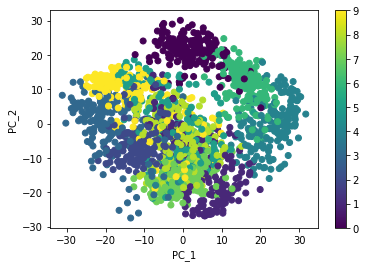

In [27]:
#Plotting the principal components as a scatter plot
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.show()